<a href="https://colab.research.google.com/github/HaeRin-OortCloud/Machine-Learning/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**7만개의 패션 이미지로 패션 분류 모델 생성하기**

-CNN 모델 생성\
-6만개의 훈련 샘플과 1만개의 테스트 샘플로 분리\
-10개의 카테고리로 분류\
 0 : T-shirt/top\
 1 : Trouser\
 2 : Pullover\
 3 : Dress\
 4 : Coat\
 5 : Sandal\
 6 : Shirt\
 7 : Sneaker\
 8 : Bag\
 9 : Ankle boot\

**라이브러리와 데이터셋 준비**

In [48]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [49]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_test.shape

(10000, 28, 28)

In [52]:
y_train.shape

(60000,)

In [53]:
y_test.shape

(10000,)

In [54]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**이미지 시각화**

8


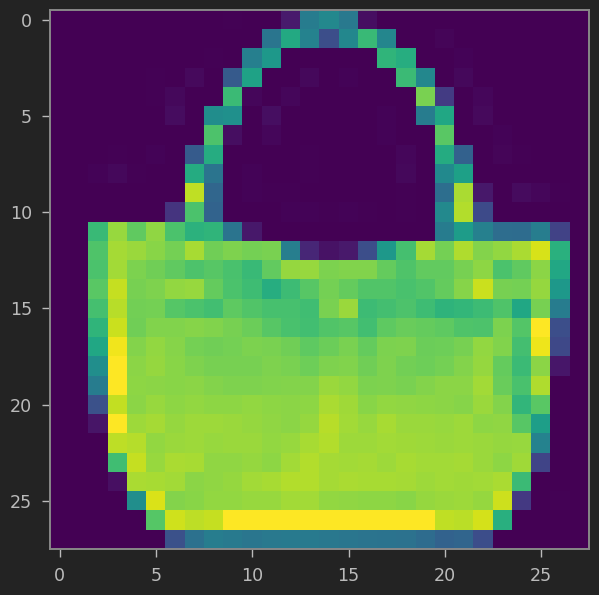

In [55]:
i = 100
plt.imshow(x_train[i])
print(y_train[i])

In [56]:
import numpy as np

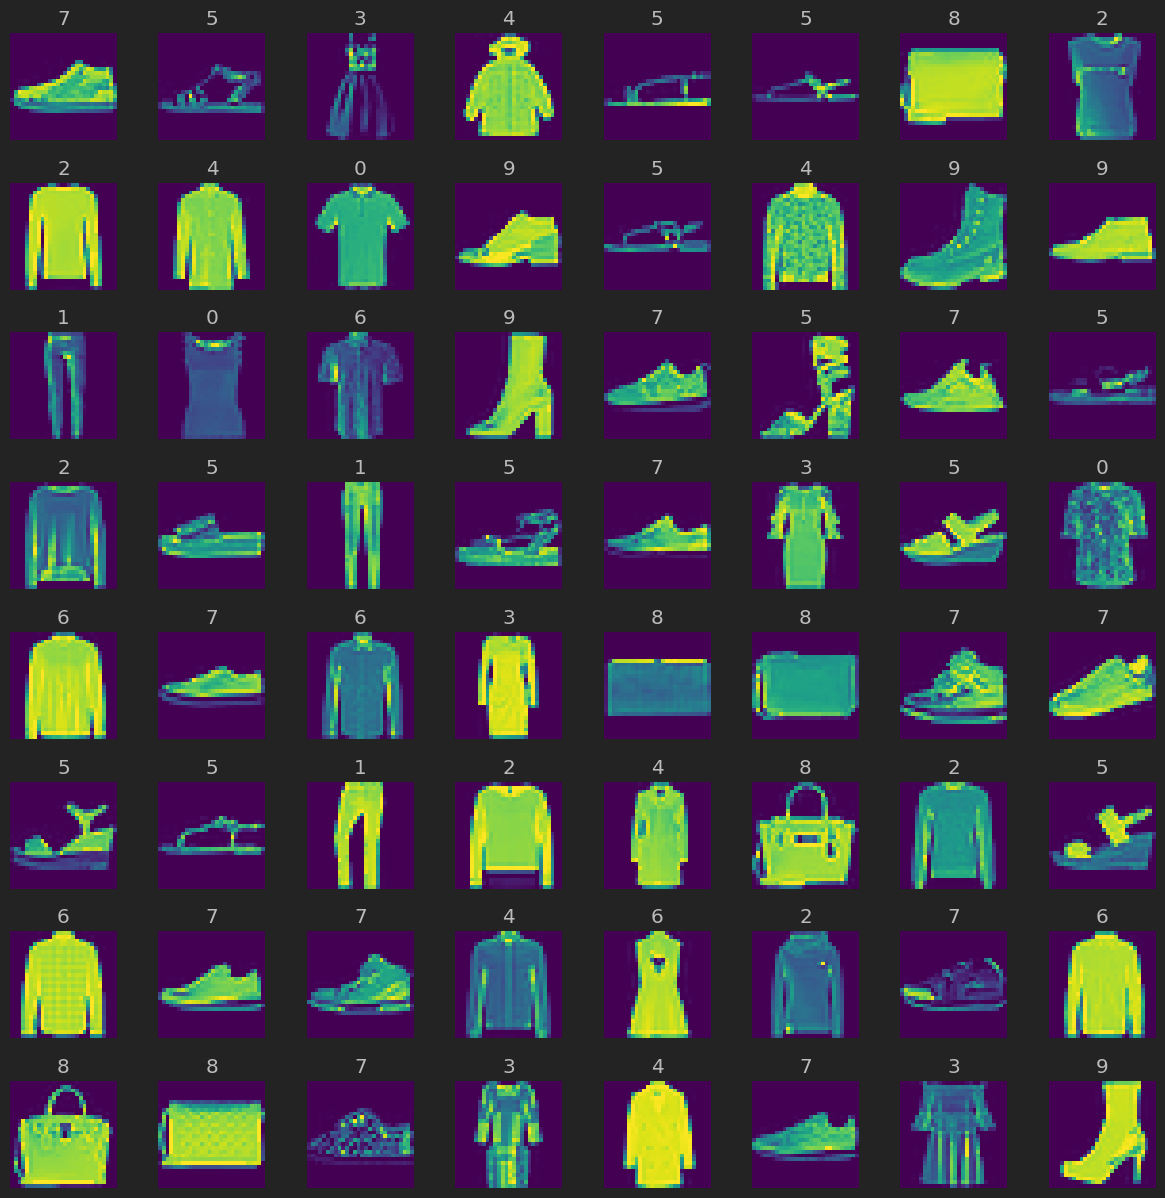

In [57]:
W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

**훈련 데이터 준비**

In [58]:
num_cate = 10
y_train = tf.keras.utils.to_categorical(y_train, num_cate)

In [59]:
y_train.shape

(60000, 10)

In [60]:
y_test = tf.keras.utils.to_categorical(y_test, num_cate)

In [61]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
x_train = np.expand_dims(x_train, axis = -1)

In [63]:
x_train.shape

(60000, 28, 28, 1)

In [64]:
y_train.shape

(60000, 10)

**딥러닝 모델 생성**

In [65]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

**딥러닝 모델 컴파일 및 훈련**

In [66]:
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
x_train.shape

(60000, 28, 28, 1)

In [69]:
epochs = 10

history = cnn.fit(x_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 45s 383ms/step - loss: 0.6176 - accuracy: 0.7839
Epoch 2/10
118/118 [==============================] - 44s 374ms/step - loss: 0.5346 - accuracy: 0.8111
Epoch 3/10
118/118 [==============================] - 45s 382ms/step - loss: 0.4812 - accuracy: 0.8293
Epoch 4/10
118/118 [==============================] - 45s 385ms/step - loss: 0.4447 - accuracy: 0.8409
Epoch 5/10
118/118 [==============================] - 44s 374ms/step - loss: 0.4133 - accuracy: 0.8523
Epoch 6/10
118/118 [==============================] - 45s 383ms/step - loss: 0.3931 - accuracy: 0.8599
Epoch 7/10
118/118 [==============================] - 45s 385ms/step - loss: 0.3727 - accuracy: 0.8649
Epoch 8/10
118/118 [==============================] - 44s 376ms/step - loss: 0.3552 - accuracy: 0.8714
Epoch 9/10
118/118 [==============================] - 45s 384ms/step - loss: 0.3396 - accuracy: 0.8763
Epoch 10/10
118/118 [==============================] - 45s 384ms/step - l

**테스트 샘플로 모델 평가**

In [70]:
x_test.shape

(10000, 28, 28)

In [71]:
x_test = np.expand_dims(x_test, axis = -1)

In [72]:
x_test.shape

(10000, 28, 28, 1)

In [73]:
y_test.shape

(10000, 10)

In [74]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4106 - accuracy: 0.8582


[0.41062867641448975, 0.8582000136375427]

In [75]:
x_test = x_test.astype('float')

In [76]:
predicted_classes = cnn.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [77]:
predicted_classes

array([[6.63562560e-06, 7.37280516e-07, 2.72292937e-07, ...,
        4.26389789e-03, 2.90576281e-06, 9.94452596e-01],
       [1.04653474e-04, 6.52988108e-09, 9.99615729e-01, ...,
        1.30662658e-09, 6.49952597e-07, 1.94890841e-08],
       [9.73506715e-08, 9.99998987e-01, 7.54061120e-14, ...,
        9.42518416e-13, 5.46240570e-13, 1.47396777e-14],
       ...,
       [3.96245838e-07, 2.09578932e-09, 1.58795194e-06, ...,
        4.31268160e-10, 9.99992311e-01, 3.73235221e-09],
       [4.70973482e-08, 9.99964535e-01, 1.03973143e-07, ...,
        5.75044723e-08, 2.63728733e-10, 1.08112426e-08],
       [3.12940031e-03, 8.50146137e-07, 1.34504462e-05, ...,
        3.20161767e-02, 2.47619357e-02, 4.57698898e-03]], dtype=float32)

In [78]:
predicted_classes = np.argmax(predicted_classes, axis = 1)

In [79]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [80]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
y_test = y_test.argmax(1)

In [82]:
y_test

array([9, 2, 1, ..., 8, 1, 5])

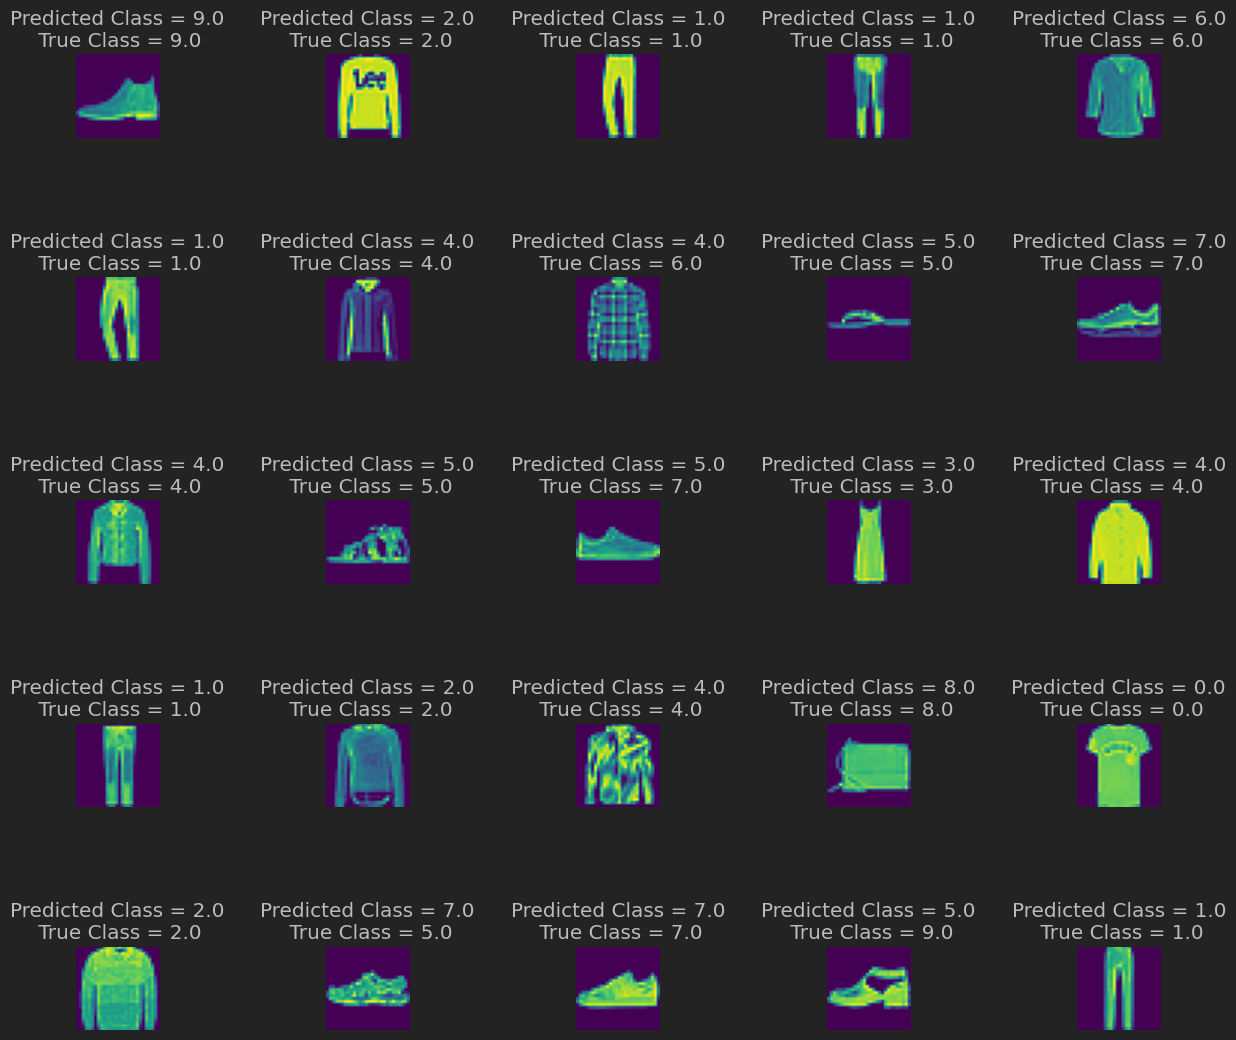

In [83]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 2)

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes, y_test)

<Axes: >

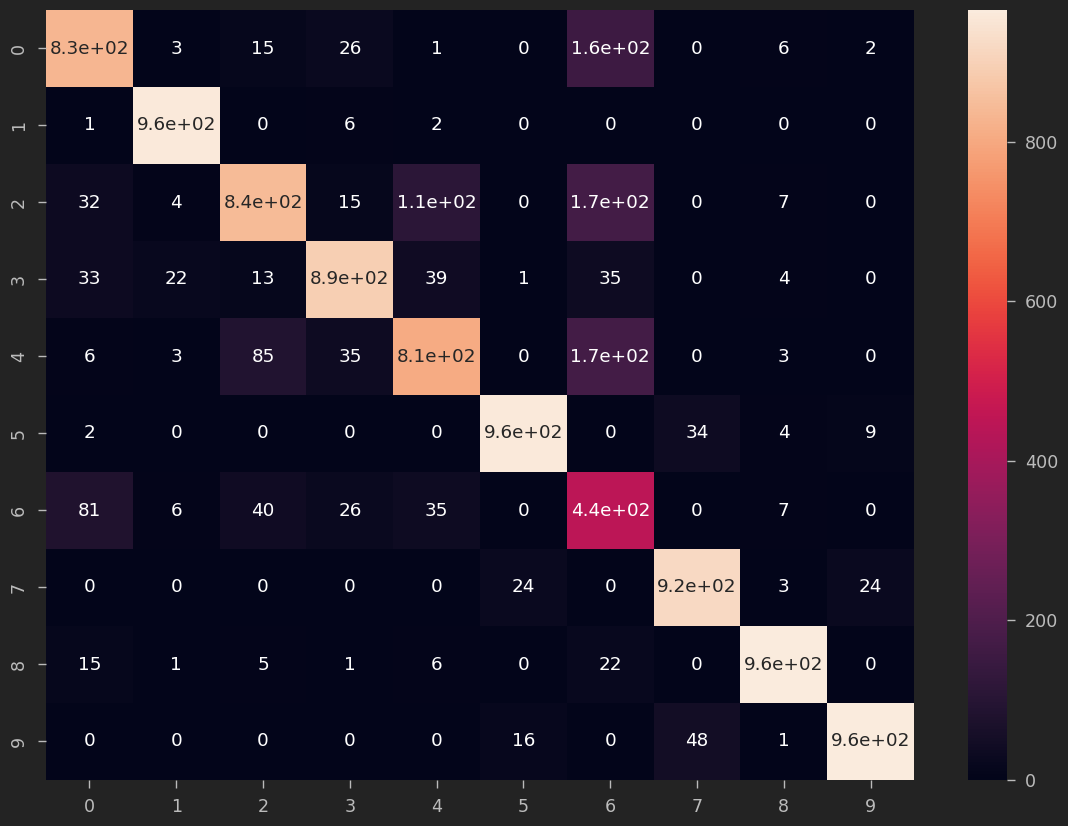

In [85]:
import seaborn as sns
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [86]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.71      0.84      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.73      0.81      0.76      1000
           5       0.95      0.96      0.96      1000
           6       0.70      0.45      0.54      1000
           7       0.95      0.92      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

